In [10]:
import numpy as np  
import matplotlib.pyplot as plt   ## Generate some data with constant variance /noise 

In [11]:
x = np.arange(100).reshape(100,1) 
intercept_ = 6 
slope_ = 0.1 ## non constant error 
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1) ## Regression equation 
y = intercept_ + slope_ * x + error_  
plt.figure(1) 
plt.scatter(x, y) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with constant variance")

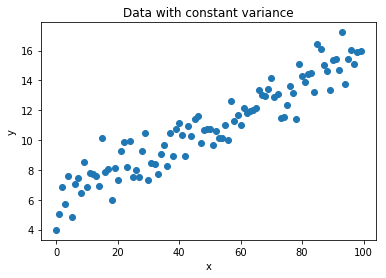

In [12]:
plt.show()

In [15]:
## Let us do a least square regression on the above dataset 
from sklearn.linear_model import LinearRegression  
model1 = LinearRegression(fit_intercept = True, normalize = False) 
model1.fit(x, y)  
y_pred1 = model1.predict(x)  
print("Mean squared error: {0:.2f}"       
      .format(np.mean((y_pred1 - y) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x, y)))  
## Plot the regression 
plt.figure(2) 
plt.scatter(x, y,  color='black') 
plt.plot(x, y_pred1, color='blue',linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression")

Mean squared error: 0.99
Variance score: 0.89


/Users/joe/Dev/ML/ML/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


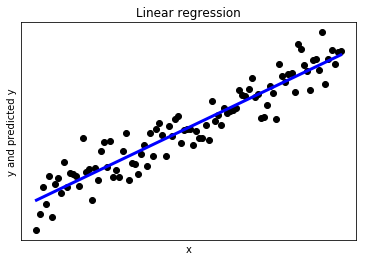

In [16]:
plt.show()

In [17]:
## Generate some data with non-constant variance 
x_ = np.arange(100).reshape(100,1) 
intercept_ = 6 
slope_ = 0.1 
## Non constant variance 
var_ = 0.1 + 0.05 * x_ 
## non constant error 
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_) 
## Regression equation 
y_ = intercept_ + slope_ * x + error_  
plt.figure(3) 
plt.scatter(x_, y_) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with non-constant variance")

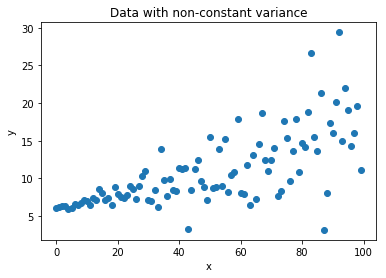

In [18]:
plt.show()


Mean squared error: 12.19
Variance score: 0.47


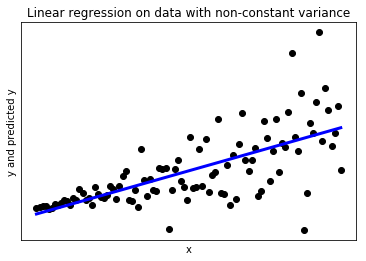

In [19]:
## Try to fit a linear regression 
model2 = LinearRegression(fit_intercept = True, normalize = False) 
model2.fit(x_, y_)  
y_pred2 = model2.predict(x_)  
print 
print("Mean squared error: {0:.2f}"       
            .format(np.mean((y_pred2 - y_) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))  
## Plot the regression 
plt.figure(4) 
plt.scatter(x_, y_,  color='black') 
plt.plot(x_, y_pred2, color='blue',linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression on data with non-constant variance")
plt.show()

In [22]:
## Quantile regression for the median, 0.5th quantile 
import pandas as pd  
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"]) 
print data.head()  
import statsmodels.formula.api as smf   
mod = smf.quantreg('y ~ x', data) 
res = mod.fit(q=.5) 
print(res.summary())

     x         y
0  0.0  6.014200
1  1.0  6.183031
2  2.0  6.354985
3  3.0  6.383812
4  4.0  5.922834
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3654
Model:                       QuantReg   Bandwidth:                       2.069
Method:                 Least Squares   Sparsity:                        5.644
Date:                Sun, 01 Oct 2017   No. Observations:                  100
Time:                        15:50:35   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8805      0.560     10.497      0.000       4.769       6.992
x              0.1025      0.010     10.484      0.000       0.083       0.122


In [23]:
## Build the model for other quantiles 
quantiles = np.arange(0.1,1,0.1) 
print quantiles  
models = [] 
params = []  
for qt in quantiles:  
    print qt  
    res = mod.fit(q = qt )    
    models.append(res)    
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())   
    params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])  
    print params


[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
0.1
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.2
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.3
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.4
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.5
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.6


/Users/joe/Dev/ML/ML/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.7
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.8
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057
0.9
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1     6.0142  0.023262       -0.002533        0.049057


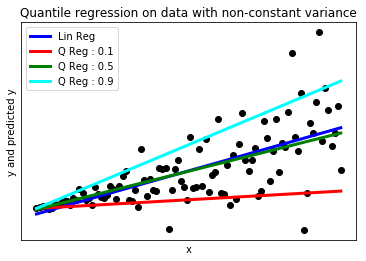

In [25]:
plt.figure(5) 
plt.scatter(x_, y_,  color='black') 
plt.plot(x_, y_pred2, color='blue', linewidth=3, label='Lin Reg')  
y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_ 
plt.plot(x_, y_pred3, color='red', linewidth=3, label='Q Reg : 0.1')  
y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_ 
plt.plot(x_, y_pred4, color='green', linewidth=3, label='Q Reg : 0.5')   
y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_ 
plt.plot(x_, y_pred5, color='cyan', linewidth=3, label='Q Reg : 0.9')   
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Quantile regression on data with non-constant variance") 
plt.legend()
plt.show()

In [28]:
## Plot the changes in the quantile coefficients 
plt.figure(6) 
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'],          
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])


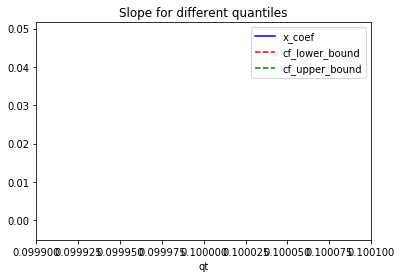

In [29]:
plt.show()